**2.3.1**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("S02-hw-dataset.csv")
%matplotlib inline

df.shape # проверим размер датасета

(41, 5)

In [11]:
df.head() # первые строки

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [14]:
df.info() # информация о столбцах и типах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [15]:
df.describe() # для числовых столбцов

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


**2.3.2**

In [18]:
missing_share = df.isna().mean().sort_values(ascending=False) # доля пропусков по каждому столбцу
missing_share

age          0.04878
user_id      0.00000
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [19]:
df.duplicated().sum() # число полностью дублирующих строк

np.int64(1)

In [22]:
num_cols = df.select_dtypes(include=[np.number]).columns # все числовые столбцы
num_cols

Index(['user_id', 'age', 'purchases', 'revenue'], dtype='object')

In [23]:
suspicious_negative = df[df[num_cols].lt(0).any(axis=1)] # строки, где есть отрицательные значения в числовых столбцах
suspicious_negative

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [25]:
# проверки качества данных по логическим правилам

# 1. Подозрительный возраст: меньше 0 или больше 120
suspicious_age = df[(df["age"] < 0) | (df["age"] > 120)]
print("Подозрительные значения возраста:")
display(suspicious_age)

# 2. Количество покупок < 0 — ошибка
suspicious_purchases = df[df["purchases"] < 0]
print("Отрицательное количество покупок:")
display(suspicious_purchases)

# 3. Доход (revenue) < 0 — ошибка
suspicious_revenue = df[df["revenue"] < 0]
print("Отрицательный доход (revenue):")
display(suspicious_revenue)

# 4. Дополнительное правило:
# revenue == 0, но purchases > 0 — тоже выглядит странно
suspicious_logic = df[(df["revenue"] == 0) & (df["purchases"] > 0)]
print("Покупки есть, но доход равен нулю:")
display(suspicious_logic)

# 5. Все подозрительные строки вместе (объединяем все условия)
suspicious_all = df[
    (df["age"] < 0) | (df["age"] > 120) |
    (df["purchases"] < 0) |
    (df["revenue"] < 0) |
    ((df["revenue"] == 0) & (df["purchases"] > 0))
].drop_duplicates()

print("Все подозрительные строки по совокупности правил:")
display(suspicious_all)


Подозрительные значения возраста:


,user_id,age,country,purchases,revenue


Отрицательное количество покупок:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


Отрицательный доход (revenue):


,user_id,age,country,purchases,revenue


Покупки есть, но доход равен нулю:


,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


Все подозрительные строки по совокупности правил:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
10,11,24.0,US,4,0


**Контроль качества данных**

В ходе проверки качества данных были обнаружены несколько проблем, связанных с логикой и реалистичностью значений.

1. **Подозрительные значения возраста.**  
   В датасете обнаружена строка с возрастом **120 лет**, что выглядит нереалистично и, вероятнее всего, является ошибкой ввода.  
   *Строка:* `user_id = 6`, `age = 120`.

2. **Отрицательное количество покупок.**  
   Найдена строка, где значение поля *purchases* равно **–1**, что невозможно в реальных данных: количество покупок не может быть отрицательным.  
   *Строка:* `user_id = 6`, `purchases = -1`.

3. **Логическая несогласованность: есть покупки, но доход равен нулю.**  
   Выявлена строка, где число покупок положительное (**4**), но *revenue* равен **0**. Это также выглядит подозрительно, так как каждая покупка должна вносить вклад в доход.  
   *Строка:* `user_id = 10`, `purchases = 4`, `revenue = 0`.

4. **Итоговый список всех проблемных записей.**  
   Подозрительными признаны две строки:
   - `user_id = 6` — содержит сразу две проблемы: нереалистичный возраст и отрицательное количество покупок.  
   - `user_id = 10` — логическая ошибка: покупки присутствуют, доход равен нулю.

**2.3.3**

In [27]:
df.columns # названия столбов

Index(['user_id', 'age', 'country', 'purchases', 'revenue'], dtype='object')

In [6]:
df['country'].value_counts() # частоты стран

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [8]:
df['age'].value_counts(normalize=True) # доля каждой категории от общего количества

age
24.0     0.128205
52.0     0.051282
31.0     0.051282
39.0     0.051282
28.0     0.051282
35.0     0.051282
47.0     0.051282
32.0     0.051282
20.0     0.025641
25.0     0.025641
46.0     0.025641
120.0    0.025641
22.0     0.025641
57.0     0.025641
36.0     0.025641
5.0      0.025641
33.0     0.025641
42.0     0.025641
21.0     0.025641
54.0     0.025641
43.0     0.025641
55.0     0.025641
26.0     0.025641
23.0     0.025641
45.0     0.025641
51.0     0.025641
18.0     0.025641
34.0     0.025641
Name: proportion, dtype: float64

In [11]:
df.groupby("country")[["age", "purchases", "revenue"]].agg(["mean", "sum", "count"])
# покажет средний возраст, сколько покупок совершили пользователи, сумсамрный доход, сколько записей в каждой группе

age              purchases                revenue             
              mean    sum count      mean sum count         mean    sum count
country                                                                      
CN       24.000000   48.0     2  4.500000   9     2  1054.000000   2108     2
DE       34.600000  173.0     5  6.500000  39     6  1445.500000   8673     6
FR       46.250000  555.0    12  4.250000  51    12   675.916667   8111    12
RU       30.076923  391.0    13  4.769231  62    13   790.076923  10271    13
US       36.714286  257.0     7  4.625000  37     8   557.375000   4459     8

In [14]:
# создание возрастных групп
df['age_group'] = pd.cut(
    df['age'],
    bins = [0, 18, 30, 45, 60, 120],
    labels = ["0-18", "18-30", "30-45", "45-60", "60+"]
)

df['age_group'].value_counts()

age_group
30-45    14
18-30    13
45-60     9
0-18      2
60+       1
Name: count, dtype: int64

In [21]:
# удаляем наномальные строки
df_clean = df[df["age"] <= 120]
df_clean = df[df["purchases"] >= 0]

In [23]:
# покупки и доход по возрастным группам
df_clean.groupby("age_group")[["purchases", "revenue"]].mean()

C:\Users\slkri\AppData\Local\Temp\ipykernel_10360\210956888.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby("age_group")[["purchases", "revenue"]].mean()


,purchases,revenue
age_group,,
0-18,6.000000,1296.000000
18-30,4.461538,565.538462
30-45,5.357143,1108.214286
45-60,4.333333,605.777778
60+,NaN,NaN


In [25]:
# частота покупок
df["purchases"].value_counts().sort_index()

purchases
-1     1
 0     3
 1     1
 2     3
 3     5
 4     4
 5     4
 6     8
 7     8
 8     1
 9     2
 11    1
Name: count, dtype: int64

In [26]:
df.groupby("purchases")["revenue"].mean()

purchases
-1      785.000
 0        0.000
 1      142.000
 2      434.000
 3      504.600
 4      747.000
 5      635.000
 6     1078.500
 7      970.375
 8     1488.000
 9     1494.000
 11    2475.000
Name: revenue, dtype: float64

**2.4**

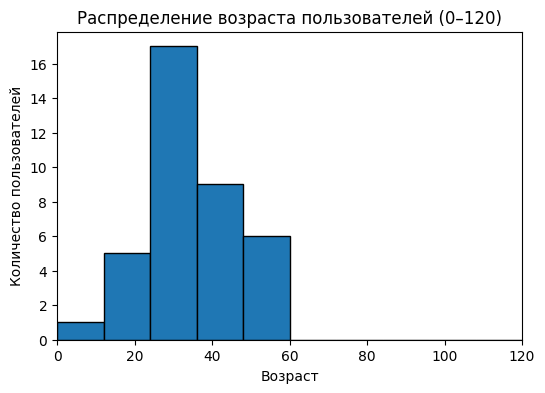

In [36]:
# гистограмма количественного признака (age)
plt.figure(figsize=(6, 4))
plt.hist(df_clean["age"], bins=10, range=(0,120), edgecolor="black")
plt.title("Распределение возраста пользователей (0–120)")
plt.xlabel("Возраст")
plt.ylabel("Количество пользователей")
plt.xlim(0, 120)

plt.savefig("figures/age_hist.png", dpi=300, bbox_inches="tight")
plt.show()

<Figure size 700x500 with 0 Axes>

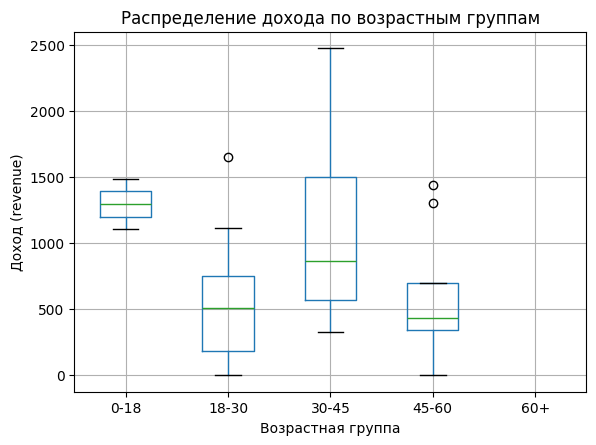

In [32]:
# боксплот по очищенным данным
plt.figure(figsize=(7, 5))

df_clean.boxplot(column="revenue", by="age_group")
plt.title("Распределение дохода по возрастным группам")
plt.suptitle("")  # убираем лишний заголовок
plt.xlabel("Возрастная группа")
plt.ylabel("Доход (revenue)")
plt.show()


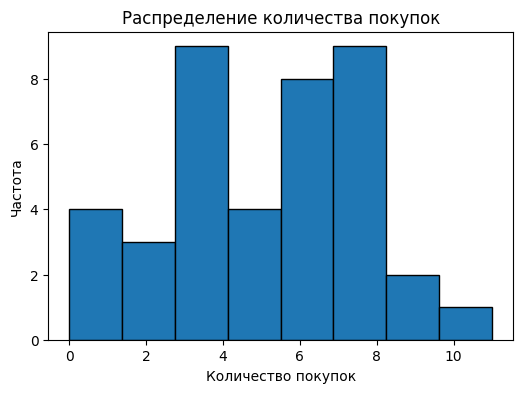

In [33]:
# гистограмма другого количественного признака (purchases)
plt.figure(figsize=(6, 4))
plt.hist(df_clean["purchases"], bins=8, edgecolor="black")
plt.title("Распределение количества покупок")
plt.xlabel("Количество покупок")
plt.ylabel("Частота")
plt.show()

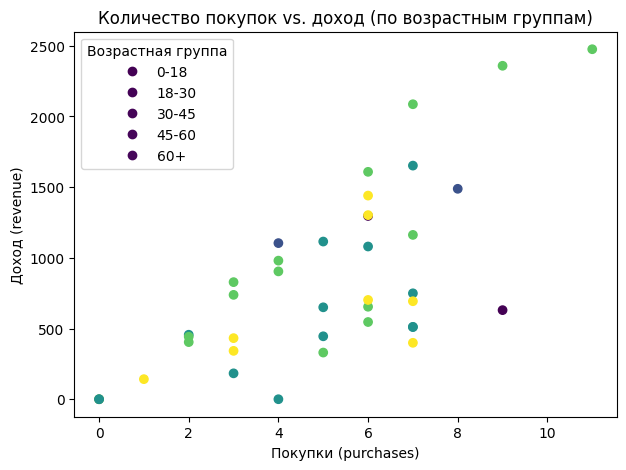

In [34]:
# scatter plot по очищенным данным
plt.figure(figsize=(7, 5))

plt.scatter(
    df_clean["purchases"],
    df_clean["revenue"],
    c=df_clean["age_group"].cat.codes,   # закодируем цветами возрастные группы
    cmap="viridis"
)

plt.title("Количество покупок vs. доход (по возрастным группам)")
plt.xlabel("Покупки (purchases)")
plt.ylabel("Доход (revenue)")

# легенда: ручная, чтобы отразить группы
groups = df_clean["age_group"].cat.categories
colors = plt.cm.viridis(range(len(groups)))

handles = [
    plt.Line2D([], [], marker="o", linestyle="", color=colors[i], label=str(groups[i]))
    for i in range(len(groups))
]

plt.legend(handles=handles, title="Возрастная группа")
plt.show()


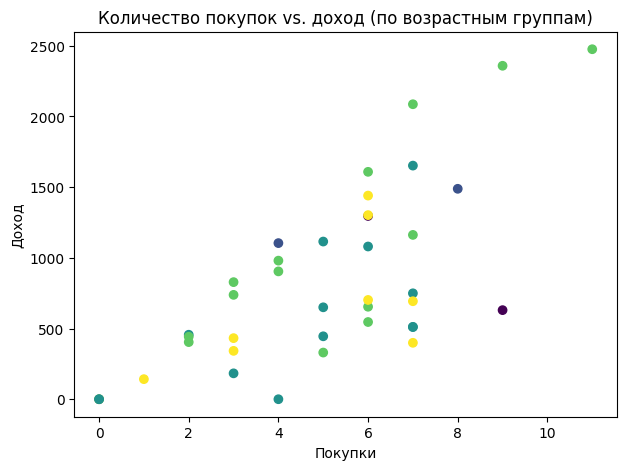

In [35]:
# сохранение графика в figures/

import os
os.makedirs("figures", exist_ok=True) # создание папки

plt.figure(figsize=(7, 5)) # сохранение scatter plot

plt.scatter(
    df_clean["purchases"],
    df_clean["revenue"],
    c=df_clean["age_group"].cat.codes,
    cmap="viridis"
)

plt.title("Количество покупок vs. доход (по возрастным группам)")
plt.xlabel("Покупки")
plt.ylabel("Доход")

plt.savefig("figures/scatter_purchases_revenue.png", dpi=300, bbox_inches="tight")
plt.show()

Гистограмма возраста (0–120) показывает, что основная часть пользователей находится в диапазонах 18–45 лет. Значение 120 лет отсутствует, так как было удалено как аномалия.

Боксплот дохода по возрастным группам демонстрирует, что группы 18–30 и 30–45 обладают более высокими медианными значениями дохода, в то время как группа 45–60 показывает меньшие значения и меньшую вариативность.

График рассеяния «покупки vs доход» подтверждает ожидаемую положительную связь между количеством покупок и доходом. Цветовая дифференциация по возрастным группам показывает, что более молодые группы чаще совершают покупки и приносят больший доход.

В целом визуальный анализ подтверждает закономерности, выявленные при EDA, и позволяет лучше понять количество покупок, возрастную структуру и распределение доходов пользователей.